In [1]:
import pandas as pd
import networkx as nx
import numpy as np
from matplotlib import pyplot as plt
import collections
from scipy.optimize import curve_fit

In [72]:
df = pd.read_csv("correlations.dat", sep='\t', header=None)
df.head()

,0,1,2
0,0,1,4.066250e-02
1,0,2,3.330670e-16
2,0,3,5.276710e-06
3,0,4,3.330670e-16
4,0,5,3.330670e-16


In [73]:
G=nx.Graph()

In [74]:
#G.add_nodes_from(np.arange(np.max(df.loc[:,1])))

In [75]:
for edge in df.loc[:,:].values:
    #G.add_weighted_edges_from([(edge[0],edge[1],edge[2])])
    if edge[2] > 0.01:
        G.add_node(edge[0])
        G.add_node(edge[1])
        G.add_edge(edge[0],edge[1])

In [76]:
N = G.number_of_nodes()
N

709

In [77]:
L = G.number_of_edges()
L

17196

In [78]:
N*(N-1)/2

250986

In [79]:
options = {'node_color': 'orange', "edge_color":'gray', "font_color": 'white', "font-family":"Helvetica", "font_size":'20', "font_style":"bold", 'node_size': 50, 'width': 0.8, 'with_labels': False}

In [80]:
lay = nx.layout.spring_layout(G, k=0.8)

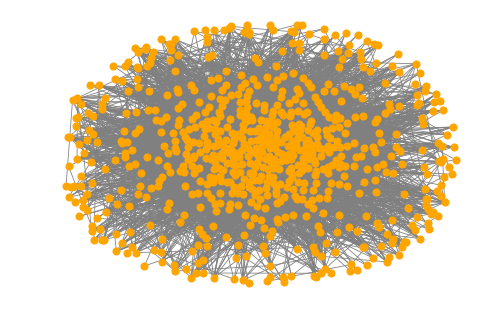

In [81]:
fig = plt.figure()
nx.draw(G, pos=lay, **options)
plt.show()

In [82]:
fig.savefig("graph.pdf")

In [83]:
degree_sequence = [d for n, d in G.degree()]  # degree sequence

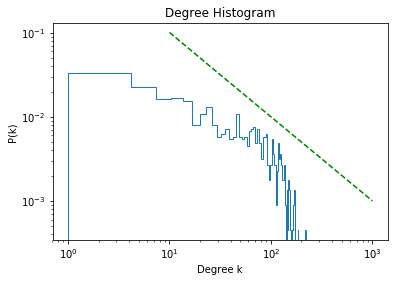

In [84]:
fig = plt.figure()
counts, bin_edges, _ = plt.hist(degree_sequence, density=True, histtype='step', bins=70)
x=np.logspace(1, 3)
plt.plot(x, 1./(x-0.1), 'g--')
plt.xscale('log')
plt.yscale('log')
plt.title("Degree Histogram")
plt.ylabel("P(k)")
plt.xlabel("Degree k")
plt.show()

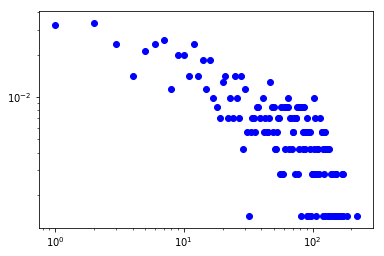

In [85]:
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
#print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())
fig, ax = plt.subplots()
plt.xscale('log')
plt.yscale('log')
norm = np.sum(cnt)
plt.scatter(deg, np.array(cnt,dtype=float)/norm, color='b', label='degree')
x=np.arange(1, np.max(degree_sequence))
#plt.plot(x, 1./(x-0.1), 'g--')
plt.show()
fig.savefig("degree_distribution.png")

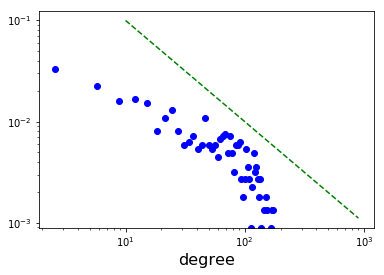

In [86]:
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2.
fig = plt.figure()
plt.xscale('log')
plt.yscale('log')
norm = np.sum(cnt)
plt.scatter(bin_centres, counts, color='b', label='degree')
x=np.arange(10, 900)
plt.plot(x, 1./x, 'g--')
plt.xlabel("degree", fontsize=16)
plt.show()
fig.savefig("degree_distribution.pdf")

In [87]:
def fitfunc(x, alpha, c):
    return np.power(x,alpha)*(10**c)

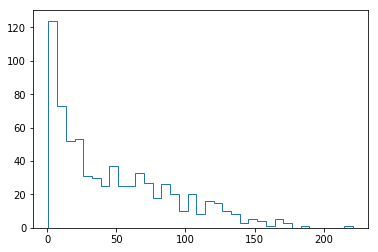

In [88]:
counts, bin_edges, _ = plt.hist(deg, weights=cnt,  histtype='step',bins=35, label='degree')
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2.

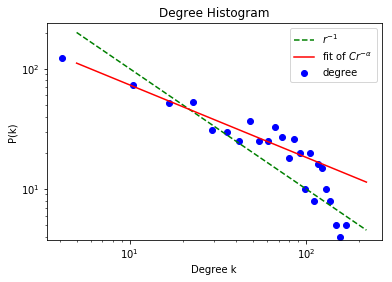

In [89]:
fig = plt.figure()
plt.scatter(bin_centres, counts, color='b', label='degree')
x=np.arange(5, np.max(degree_sequence))
plt.plot(x, 1./(x-0.01)*(10**3), 'g--', label='$r^{-1}$')
popt, pcov = curve_fit(fitfunc, bin_centres[:20], counts[:20])
plt.plot(x, fitfunc(x, *popt), 'r', label='fit of $C r^{-\\alpha}$')
plt.xscale('log')
plt.yscale('log')
plt.title("Degree Histogram")
plt.ylabel("P(k)")
plt.xlabel("Degree k")
plt.legend()
plt.show()

In [90]:
popt

array([-0.60218064,  2.46753876])

In [91]:
fig.savefig("degree_distribution.pdf")